<a href="https://colab.research.google.com/github/jmuzquiz/HousingPriceMachineLearningProject/blob/main/Housing_Price_Prediction_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading Data Set**

In [49]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import sklearn as sk #import separately later

In [50]:
#load data
#target variable is median house value
#going to try to predict house value based on other features

data = pd.read_csv("housing.csv")

**Data Exploration**
***Cleaning and Splitting***

```
# This is formatted as code
```



In [51]:
data #maybe just look at head
#ocean proximity will need to be preprocessed
#because the text cannot be fed into model like this
#others will probably need to be scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [52]:
data.info() #to see if we have any null values
#total bedrooms has some missing
#not that many, we will drop them
#note the column types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [53]:
data.dropna(inplace = True)
#df has less rows now

In [54]:
data.info() #worked

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [55]:
#split the data into test and train data and x and y data
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1) #say axis =1 since we are dropping column (why?)
y = data['median_house_value']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #80/20 split
#test set is when done with training model, done with hyperparameter tuning, now
#now evaluate it on test set

In [57]:
#combine to make the full train data
train_data = X_train.join(y_train)

In [58]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11422,-117.98,33.71,24.0,3430.0,548.0,1601.0,512.0,5.6825,<1H OCEAN,264600.0
12598,-121.49,38.52,37.0,1902.0,413.0,955.0,384.0,3.1014,INLAND,96800.0
19267,-122.74,38.44,17.0,2287.0,497.0,1240.0,493.0,3.5845,<1H OCEAN,164300.0
4281,-118.32,34.09,27.0,210.0,98.0,332.0,112.0,2.5556,<1H OCEAN,175000.0
10738,-117.91,33.60,37.0,2088.0,510.0,673.0,390.0,5.1048,<1H OCEAN,500001.0
...,...,...,...,...,...,...,...,...,...,...
17474,-119.89,34.44,25.0,2786.0,470.0,1669.0,462.0,5.5184,NEAR OCEAN,268300.0
17100,-122.26,37.45,17.0,2742.0,441.0,986.0,421.0,5.9285,NEAR OCEAN,496000.0
578,-122.06,37.71,36.0,3541.0,570.0,1478.0,529.0,4.6350,NEAR BAY,248600.0
2377,-119.54,36.70,20.0,1815.0,375.0,1665.0,357.0,2.2448,INLAND,58900.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

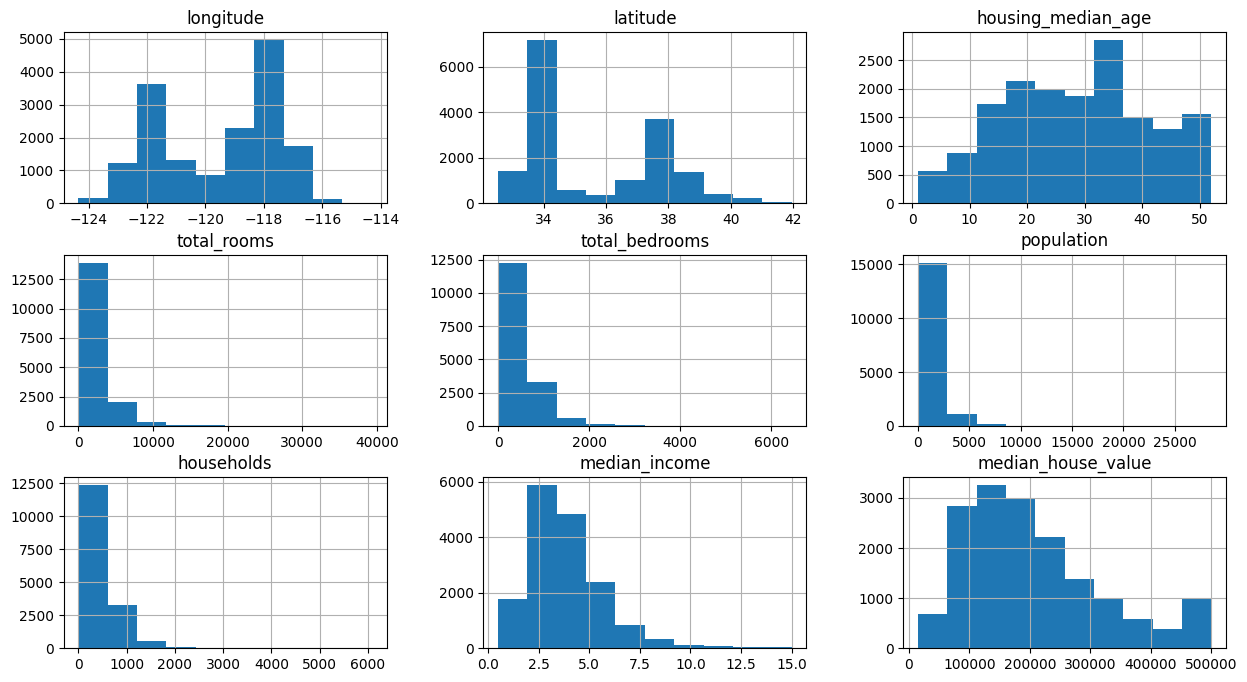

In [59]:
#basic exploration of numeric variables (not ocean proximity)
train_data.hist(figsize = (15,8))
#make observations later

<Axes: >

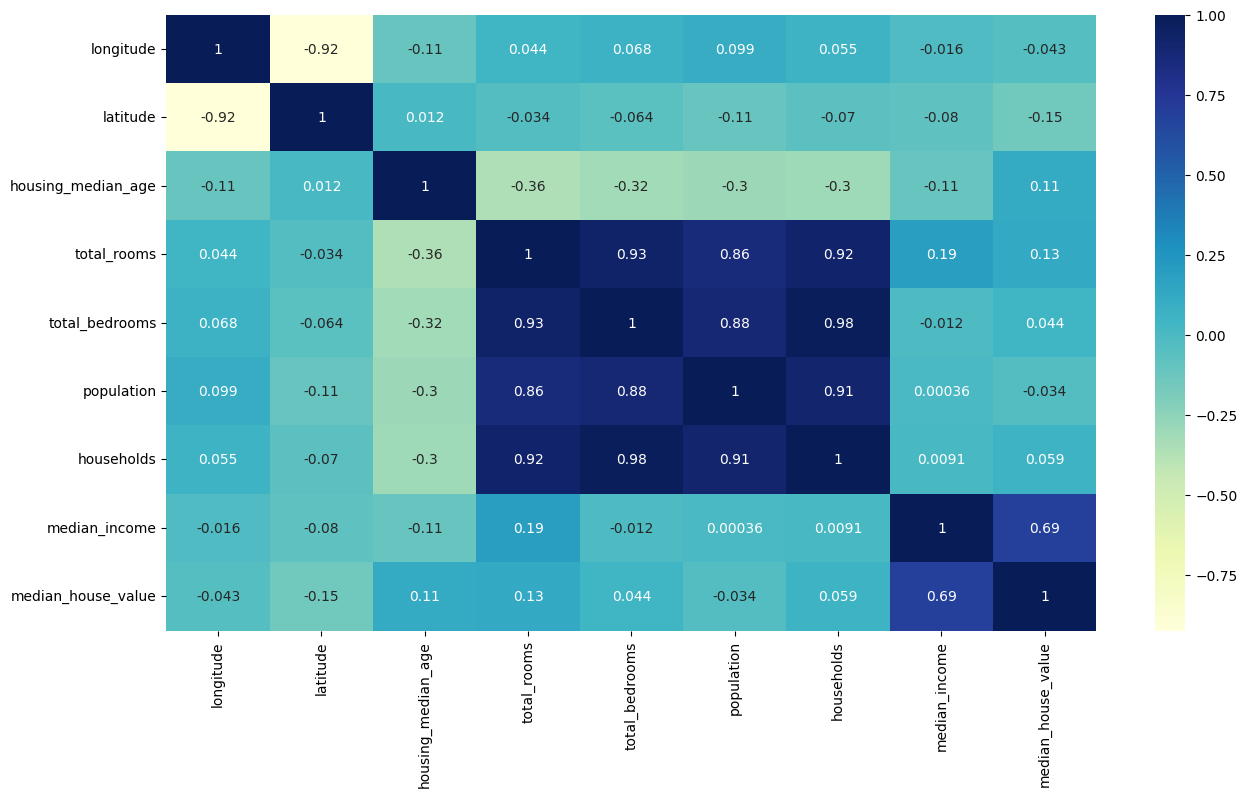

In [60]:
#now do correlations with target variable
#can only do this for numerical
numerical_train_data = train_data.select_dtypes(include = np.number)
correlation_matrix = numerical_train_data.corr()
plt.figure(figsize = (15,8))
sns.heatmap(correlation_matrix, annot = True, cmap = "YlGnBu")
#median income correlates very much with median house value
#latitude is negatively correlated with the house value
#do more exploration if want

**Data Preprocessing**

In [61]:
#many hists are skewed (take log?) (right skewed?)
#there was also bimodal data ugh

train_data['total_rooms'] = np.log(train_data['total_rooms'] +1) #to avoid zero values
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] +1)
train_data['population'] = np.log(train_data['population'] +1)
train_data['households'] = np.log(train_data['households'] +1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

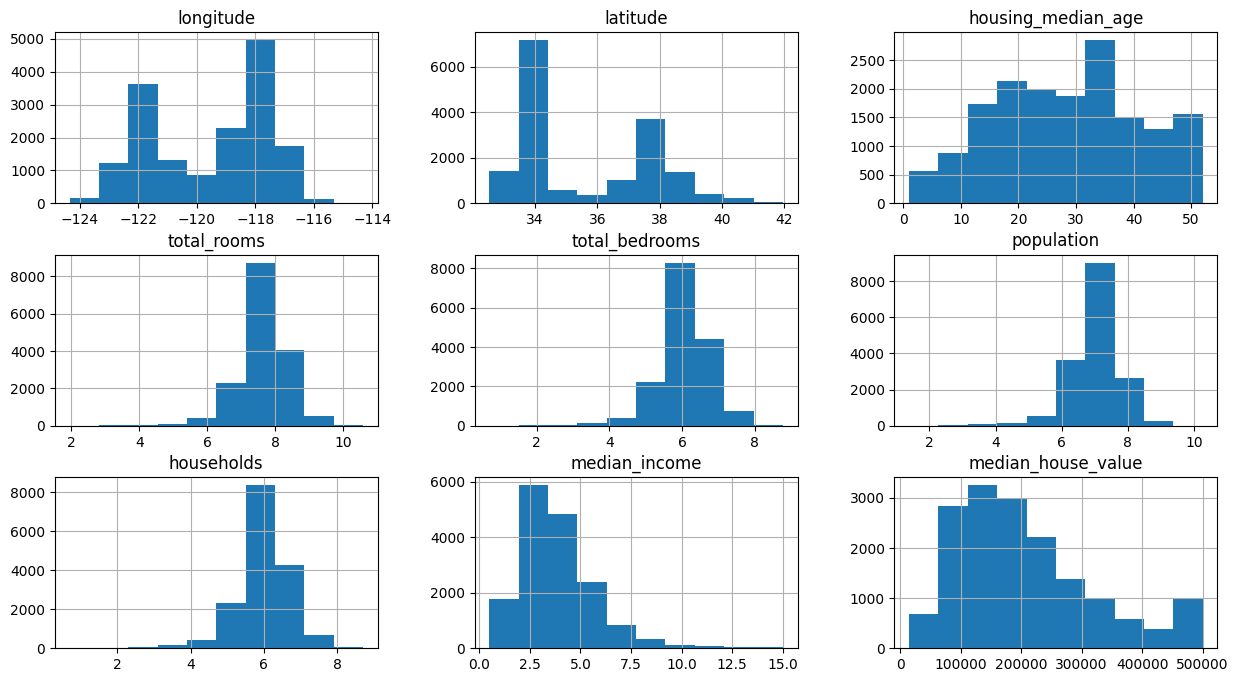

In [62]:
train_data.hist(figsize = (15,8)) #those 4 look more normal now
#do other transformations later?

In [63]:
#have to deal with ocean proximity
#one hot encoding
train_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7257
INLAND        5166
NEAR OCEAN    2121
NEAR BAY      1799
ISLAND           3
Name: count, dtype: int64

In [64]:
dummies = pd.get_dummies(train_data.ocean_proximity)
# Convert the boolean values to integers (0 and 1)
dummies = dummies.astype(int)

print(dummies)

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
11422          1       0       0         0           0
12598          0       1       0         0           0
19267          1       0       0         0           0
4281           1       0       0         0           0
10738          1       0       0         0           0
...          ...     ...     ...       ...         ...
17474          0       0       0         0           1
17100          0       0       0         0           1
578            0       0       0         1           0
2377           0       1       0         0           0
18832          0       1       0         0           0

[16346 rows x 5 columns]


In [65]:
train_data = train_data.join(dummies).drop('ocean_proximity', axis = 1)

In [66]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11422,-117.98,33.71,24.0,8.140607,6.308098,7.379008,6.240276,5.6825,264600.0,1,0,0,0,0
12598,-121.49,38.52,37.0,7.551187,6.025866,6.862758,5.953243,3.1014,96800.0,0,1,0,0,0
19267,-122.74,38.44,17.0,7.735433,6.210600,7.123673,6.202536,3.5845,164300.0,1,0,0,0,0
4281,-118.32,34.09,27.0,5.351858,4.595120,5.808142,4.727388,2.5556,175000.0,1,0,0,0,0
10738,-117.91,33.60,37.0,7.644441,6.236370,6.513230,5.968708,5.1048,500001.0,1,0,0,0,0


<Axes: >

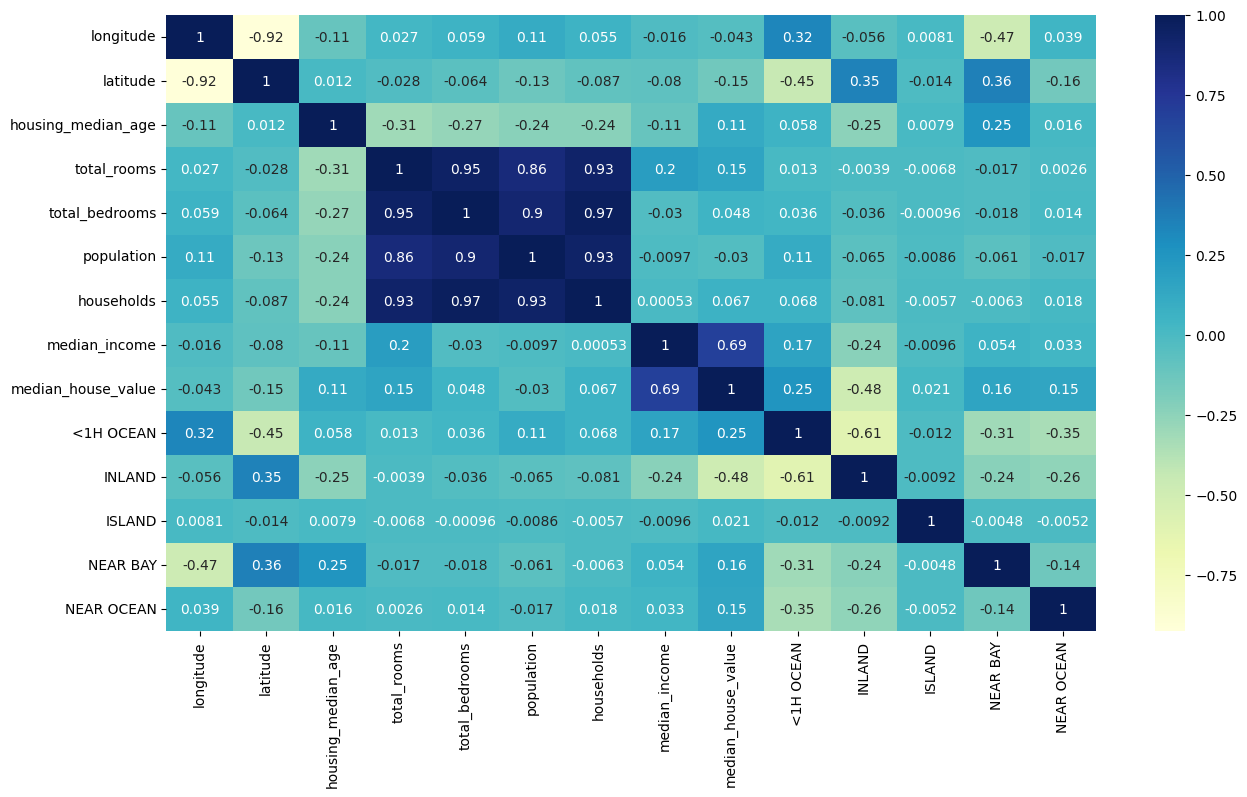

In [67]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")
#negative corr between inland and median house value
#less than 1 hour from ocean has postive corr with median house value
#make other observations

<Axes: xlabel='latitude', ylabel='longitude'>

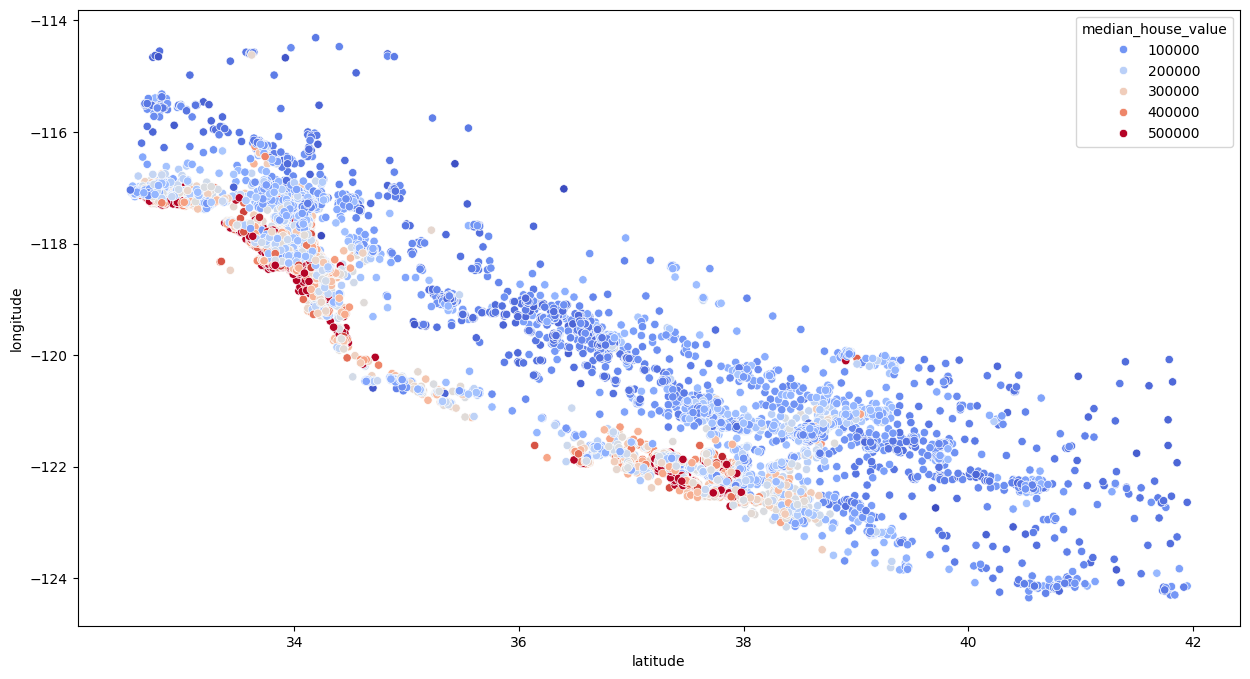

In [68]:
#feature engineering
#take features we already have and make them into new ones
#visualization of the coordinates first
plt.figure(figsize = (15,8))
sns.scatterplot(x = 'latitude', y = 'longitude', data = train_data,
                hue = 'median_house_value', palette='coolwarm')
#red is touching the coast (more expensive), up and to the right is more inland

In [69]:
#how many rooms are bedrooms? new feature
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['rooms_per_household'] = train_data['total_rooms'] / train_data['households']
#explain these
#add these, i did they weren't highly correlated so not keeping
#train_data['population_density_per_room'] = data['population'] / data['total_rooms']
#train_data['population_density_per_household'] = data['population'] / data['households']

<Axes: >

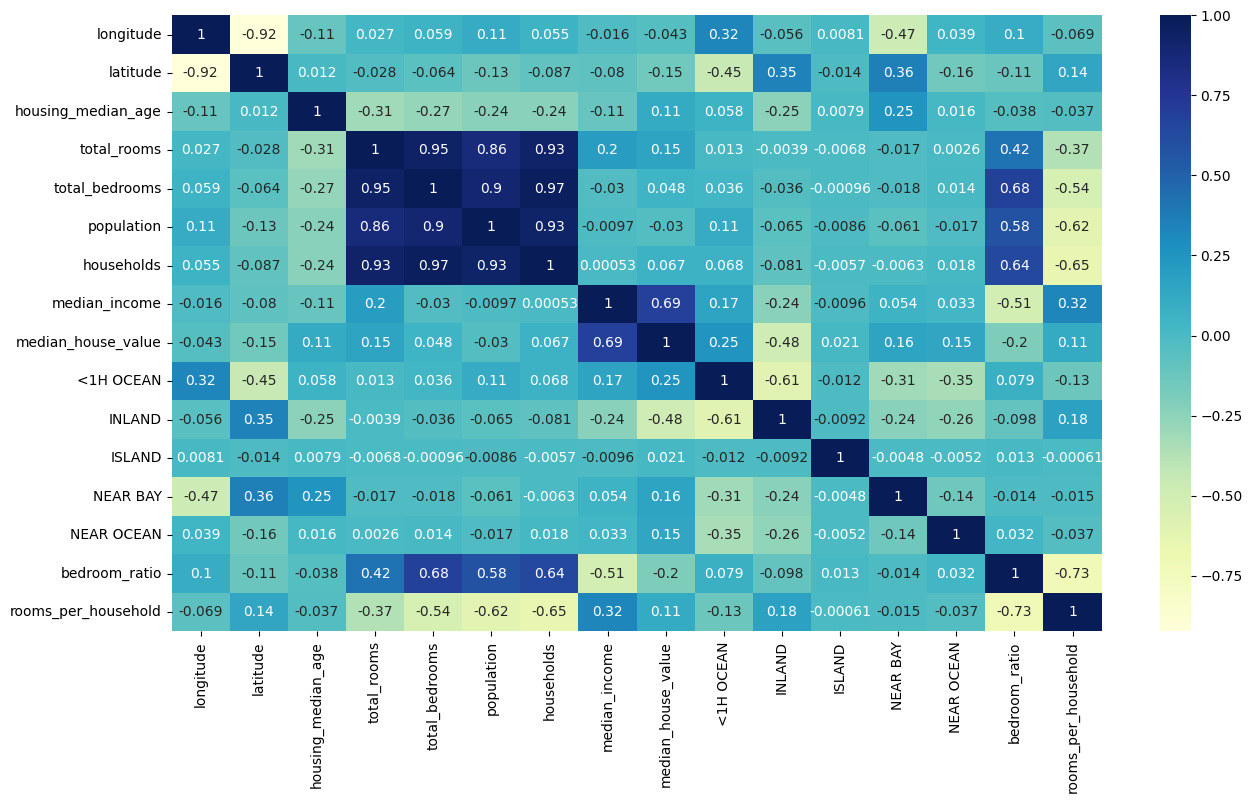

In [70]:
#correlation heatmap again
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")
#bedroom ratio negative corr with median house value
#total bedrooms wasn't that interesting
#make more features later, drop features later if needed (stepwise?)
#can be good to drop features with close to zero correlation

In [71]:
#start linear model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#we don't have to do the train test split again, but since we added more features
#we have to do the x y split again
X_train, y_train = train_data.drop('median_house_value', axis = 1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train) #29:55 stuff maybe make separate

reg = LinearRegression()

reg.fit(X_train_s, y_train)
#we did not scale the data
#2nd attempt don't need to scale output

LinearRegression()

In [72]:
#not going to do hyperparameter tuning for linear regression
#do same process to test that we did to train
#this would be better as a function instead of copy pasting or repeating code
#maybe don't split data so early?

test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] +1) #to avoid zero values
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] +1)
test_data['population'] = np.log(test_data['population'] +1)
test_data['households'] = np.log(test_data['households'] +1)

test_dummies = pd.get_dummies(test_data.ocean_proximity)
# Convert the boolean values to integers (0 and 1)
test_dummies = test_dummies.astype(int)
test_data = test_data.join(test_dummies).drop('ocean_proximity', axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['rooms_per_household'] = test_data['total_rooms'] / test_data['households']

In [73]:
X_test, y_test = test_data.drop('median_house_value', axis = 1), test_data['median_house_value']

In [74]:
X_test_s = scaler.transform(X_test)

In [75]:
test_data
#there was only 3 instances of island. check the split or figure out reproducability
#so checked to make sure that train and test both have 16 columns and they do

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,rooms_per_household
17790,-121.82,37.37,41.0,7.351800,5.641907,6.878326,5.720312,4.4167,215200.0,1,0,0,0,0,0.767418,1.285210
3873,-118.54,34.22,35.0,7.417580,5.707110,6.908755,5.736572,4.6731,224100.0,1,0,0,0,0,0.769403,1.293034
6149,-117.97,34.10,26.0,7.244228,5.627621,7.159292,5.624018,4.0000,160100.0,0,1,0,0,0,0.776842,1.288088
15338,-117.29,33.20,16.0,7.673688,6.135565,7.264730,6.011267,2.4754,157300.0,0,0,0,0,1,0.799559,1.276551
2939,-118.95,35.36,30.0,7.738488,6.232448,7.469654,6.180017,2.1078,54700.0,0,1,0,0,0,0.805383,1.252179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11381,-117.95,33.68,19.0,6.936343,5.257495,5.831882,5.075174,3.6364,252800.0,1,0,0,0,0,0.757964,1.366720
117,-122.25,37.83,52.0,8.340695,7.008505,7.488294,6.945051,3.0897,234100.0,0,0,0,1,0,0.840278,1.200955
17117,-122.16,37.48,36.0,7.713785,6.173786,7.575585,6.126869,2.3769,157300.0,0,0,0,1,0,0.800358,1.259009
712,-122.08,37.67,29.0,6.202536,5.129899,5.455321,5.030438,0.9637,160000.0,0,0,0,1,0,0.827065,1.233001


In [76]:
reg.score(X_test_s, y_test)
#0.6638960258634334
#not too bad but not too good
#probs better with random forest model

#what if we scale the data?
#scaled didn't seem to change much for tutorial guy
#doesn't seem to have changed at all for me
#but usually want to scale data
#scaled next time i ran was 0.6674775624548852

0.6645344431955627

In [77]:
#trying
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Predictions and evaluation for Linear Regression
y_pred_lr = reg.predict(X_test_s)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

In [78]:
#now random forest and hyperparameter tuning
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train_s, y_train)
#18seconds

RandomForestRegressor()

In [79]:
#trying
# Predictions and evaluation for base Random Forest
y_pred_rf_base = forest.predict(X_test_s)
r2_rf_base = r2_score(y_test, y_pred_rf_base)
rmse_rf_base = np.sqrt(mean_squared_error(y_test, y_pred_rf_base))
mae_rf_base = mean_absolute_error(y_test, y_pred_rf_base)

In [80]:
forest.score(X_test_s, y_test)
#0.8154555539338484 is this R^2 ?
#0.8150837058654673 scaled is worse
#second time running scaled is 0.8249619158402888
#need reproducability

0.817623811961398

In [37]:
#adding back in grid search too long attempt
#the one that was 540 fits idk
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

forest = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)

grid_search.fit(X_train_s, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (R^2): ", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: 

In [81]:
#second attempt still
import time
from sklearn.ensemble import RandomForestRegressor

# Example single set of parameters
params = {
    'n_estimators': 100,
    'max_depth': 20,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

# Initialize the model with these parameters
forest = RandomForestRegressor(**params, random_state=42)

# Start timing
start_time = time.time()

# Fit the model on the training data
forest.fit(X_train_s, y_train)

# End timing
end_time = time.time()

# Calculate the time taken
single_fit_time = end_time - start_time
print(f"Time taken for a single fit: {single_fit_time} seconds")

# Estimate the total time
total_time = single_fit_time * 540
print(f"Estimated total time for 540 fits: {total_time / 60} minutes")
#may need to find code that gave us 540 fits before this because i deleted it lol
#grid search will take too long so do randomized search


Time taken for a single fit: 17.701106786727905 seconds
Estimated total time for 540 fits: 159.30996108055115 minutes


In [39]:
#second attempt still
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

forest = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV with a reasonable number of iterations
n_iter_search = 30  # You can adjust this number based on your preference

random_search = RandomizedSearchCV(estimator=forest, param_distributions=param_dist, n_iter=n_iter_search, cv=5, scoring='r2', n_jobs=-1, verbose=2, random_state=42)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_s, y_train)

# Print the best parameters and best score
print("Best parameters found with RandomizedSearchCV: ", random_search.best_params_)
print("Best cross-validation score with RandomizedSearchCV (R^2): ", random_search.best_score_)
#still taking a long time

Fitting 5 folds for each of 30 candidates, totalling 150 fits


KeyboardInterrupt: 

In [82]:
# Print the shape of X_train and y_train
print("Number of samples in X_train:", X_train.shape[0])
print("Number of samples in y_train:", y_train.shape[0])

#random 5000
# Further split the training set to create a smaller subset for faster computation
# Using underscores to ignore the remaining parts of the split
X_train_small, _, y_train_small, _ = train_test_split(X_train_s, y_train, train_size=5000, random_state=42, shuffle=True)

# Print the shape of the smaller subset to confirm
print("Number of samples in X_train_small:", X_train_small.shape[0])
print("Number of samples in y_train_small:", y_train_small.shape[0])




Number of samples in X_train: 16346
Number of samples in y_train: 16346
Number of samples in X_train_small: 5000
Number of samples in y_train_small: 5000


In [85]:
#still second attempt
import time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions with narrower ranges
param_dist = {
    'n_estimators': randint(100, 500),  # Reduced range
    'max_depth': randint(10, 30),       # Reduced range
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Initialize the model
forest = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV
n_iter_search = 30  # Adjust as needed
random_search = RandomizedSearchCV(estimator=forest, param_distributions=param_dist, n_iter=n_iter_search, cv=3, scoring='r2', n_jobs=-1, verbose=2, random_state=42)

# Start timing
start_time = time.time()

# Fit the RandomizedSearchCV to the reduced training data
random_search.fit(X_train_small, y_train_small)

# End timing
end_time = time.time()

# Calculate the time taken
total_time = end_time - start_time
print(f"Total time for RandomizedSearchCV with 30 iterations: {total_time / 60:.2f} minutes")

# Print the best parameters and best score
print("Best parameters found with RandomizedSearchCV: ", random_search.best_params_)
print("Best cross-validation score with RandomizedSearchCV (R^2): ", random_search.best_score_)

#got this with 5
#Fitting 3 folds for each of 5 candidates, totalling 15 fits
#Total time for RandomizedSearchCV with 30 iterations: 1.81 minutes
#Best parameters found with RandomizedSearchCV:  {'max_depth': 16, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 314}
#Best cross-validation score with RandomizedSearchCV (R^2):  0.7635666128493787

#for 30
#Fitting 3 folds for each of 30 candidates, totalling 90 fits
#Total time for RandomizedSearchCV with 30 iterations: 10.03 minutes
#Best parameters found with RandomizedSearchCV:  {'max_depth': 23, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 364}
#Best cross-validation score with RandomizedSearchCV (R^2):  0.7644347923118439


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Total time for RandomizedSearchCV with 30 iterations: 9.84 minutes
Best parameters found with RandomizedSearchCV:  {'max_depth': 22, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 426}
Best cross-validation score with RandomizedSearchCV (R^2):  0.7575458588240306


In [84]:
#okay first ran above with n_iter_search = 5 then ran this code then ran above code again with 30
#because 10 minutes is acceptable
# Estimate the time for the full search
#first did this with 5 fix this code
n_iter_search_full = 30  # Full number of iterations
estimated_total_time_full = (total_time / n_iter_search) * n_iter_search_full
print(f"Estimated total time for RandomizedSearchCV with {n_iter_search_full} iterations: {estimated_total_time_full / 60:.2f} minutes")
#this used to say like 10 minutes

Estimated total time for RandomizedSearchCV with 30 iterations: 10.58 minutes


In [86]:
# Retrain the model on the full dataset with the best parameters
best_forest = random_search.best_estimator_
best_forest.fit(X_train_s, y_train)
score = best_forest.score(X_test_s, y_test)
print(f"R^2 score on test data: {score}")
#R^2 score on test data: 0.82389823419109
#1 min

R^2 score on test data: 0.8195497031302518


In [87]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,rooms_per_household
11422,-117.98,33.71,24.0,8.140607,6.308098,7.379008,6.240276,5.6825,1,0,0,0,0,0.774893,1.304527
12598,-121.49,38.52,37.0,7.551187,6.025866,6.862758,5.953243,3.1014,0,1,0,0,0,0.798002,1.268416
19267,-122.74,38.44,17.0,7.735433,6.210600,7.123673,6.202536,3.5845,1,0,0,0,0,0.802877,1.247141
4281,-118.32,34.09,27.0,5.351858,4.595120,5.808142,4.727388,2.5556,1,0,0,0,0,0.858603,1.132096
10738,-117.91,33.60,37.0,7.644441,6.236370,6.513230,5.968708,5.1048,1,0,0,0,0,0.815805,1.280753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17474,-119.89,34.44,25.0,7.932721,6.154858,7.420579,6.137727,5.5184,0,0,0,0,1,0.775882,1.292453
17100,-122.26,37.45,17.0,7.916807,6.091310,6.894670,6.045005,5.9285,0,0,0,0,1,0.769415,1.309644
578,-122.06,37.71,36.0,8.172447,6.347389,7.299121,6.272877,4.6350,0,0,0,1,0,0.776682,1.302823
2377,-119.54,36.70,20.0,7.504392,5.929589,7.418181,5.880533,2.2448,0,1,0,0,0,0.790149,1.276141


In [89]:
# Predictions and evaluation for the tuned Random Forest
y_pred_rf_tuned = best_forest.predict(X_test_s)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned))
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)

In [90]:
# Create a DataFrame to display the results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Base Random Forest', 'Tuned Random Forest'],
    'R^2': [r2_lr, r2_rf_base, r2_rf_tuned],
    'RMSE': [rmse_lr, rmse_rf_base, rmse_rf_tuned],
    'MAE': [mae_lr, mae_rf_base, mae_rf_tuned]
})

print(results)

                 Model       R^2          RMSE           MAE
0    Linear Regression  0.664534  67009.934348  48184.906111
1   Base Random Forest  0.817624  49408.229449  32253.651816
2  Tuned Random Forest  0.819550  49146.661813  32085.596838


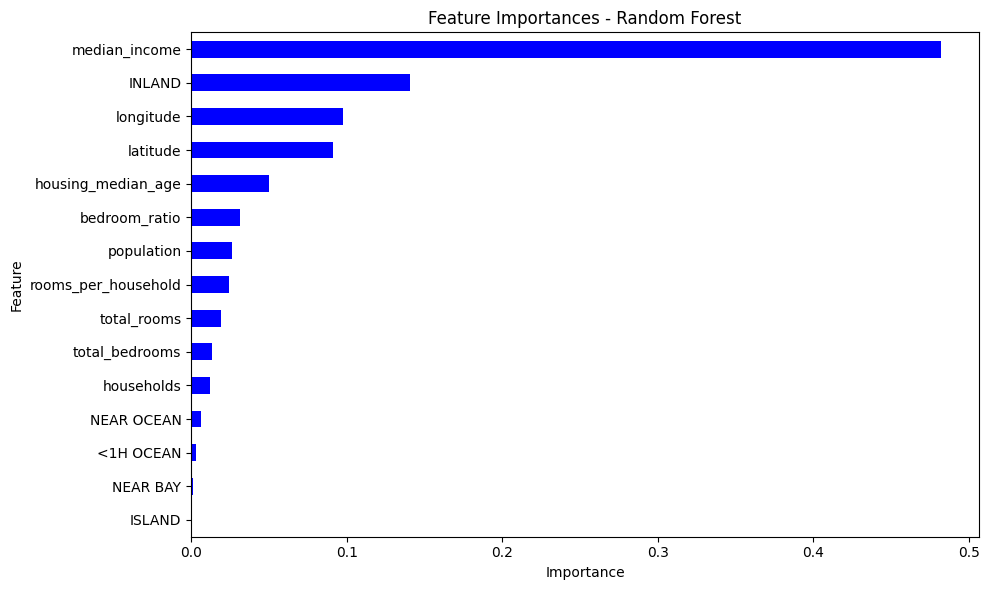

In [91]:
# Access feature importances
importances = best_forest.feature_importances_

# Match importances to features
feature_names = X_train.columns  # Use X_train directly if it has the correct column names
feature_importances = pd.Series(importances, index=feature_names)

# Sort and visualize
sorted_importances = feature_importances.sort_values(ascending=False)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='barh', color='blue')
plt.title('Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis() #reverse y-axis order to have most important at top
plt.tight_layout()
plt.show()

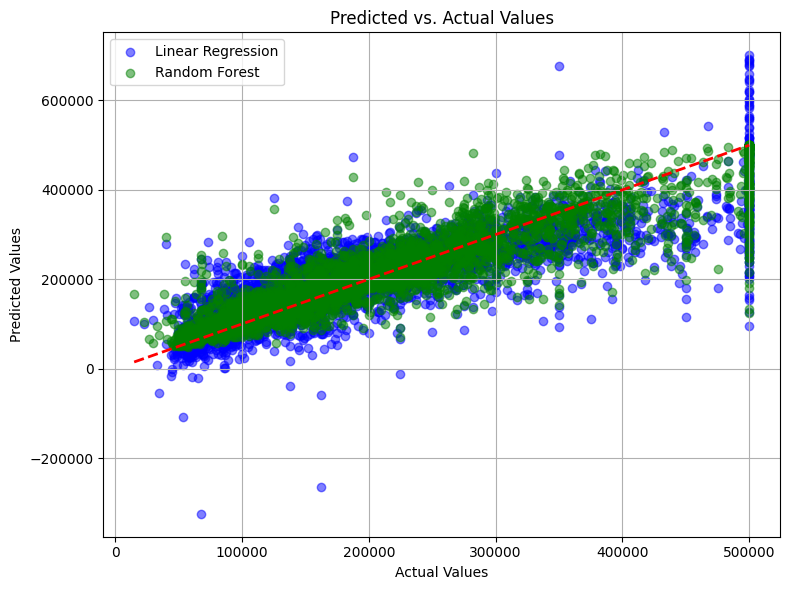

In [92]:
import matplotlib.pyplot as plt

# Predictions
y_pred_linear = reg.predict(X_test_s)
y_pred_forest = best_forest.predict(X_test_s)

# Scatter plot for linear regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5, label='Linear Regression')

# Scatter plot for random forest
plt.scatter(y_test, y_pred_forest, color='green', alpha=0.5, label='Random Forest')

# Plotting the diagonal line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)

plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#end looks a lot better


In [50]:
#grid search with cross validation (k fold) #og
#then evaluate parameters
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 200, 300], #diff parameters we want to try
    'min_samples_split': [2, 4], #36:18
    'max_depth': [None, 4, 8]
}

#max_features ended up not being useful
#default random forest is 100 trees (n_estimators?) and our max 30 was bad
#so go in other direction

grid_search = GridSearchCV(forest, param_grid, cv = 5,
                           scoring = 'neg_mean_squared_error', #because need positive score
                           return_train_score=True)
grid_search.fit(X_train_s, y_train) #trying scaled right away


KeyboardInterrupt: 

In [46]:
best_forest = grid_search.best_estimator_

In [47]:
best_forest.score(X_test_s, y_test)
#0.8133458609925877
#slightly worse performance

0.8133458609925877

In [ ]:
#try neural network, maybe xgboost idk

In [51]:
#chatgpt code
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Cross-validation score
cv_score = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
print("Cross-validation score: ", cv_score.mean())


Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: 

In [52]:
#chatgpt code 2
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter distributions
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Perform randomized search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

# Cross-validation score
cv_score = cross_val_score(random_search.best_estimator_, X_train, y_train, cv=5)
print("Cross-validation score: ", cv_score.mean())
#figure this shit out tomorrow


Fitting 5 folds for each of 50 candidates, totalling 250 fits


KeyboardInterrupt: 